<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [13]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [19]:
# Display the variables (column names) in Sheet1
variables = sheet1_data.columns.tolist()

variables


['SN',
 'VESSEL',
 'REFERENCE NUMBER',
 'VOYAGE NUMBER',
 'LOA',
 'ROT',
 'BERTH',
 'DRAFT (ARRIVAL)',
 'DRAFT (DEPARTURE)',
 'LINE',
 'SERVICE',
 "DISCHARGED-(FULL/ FCL-20')",
 "DISCHARGED-(FULL/ FCL-40')",
 "DISCHARGED-(FULL/ LCL-20')",
 "DISCHARGED-(FULL/ LCL-40')",
 "DISCHARGED-(EMPTY-20')",
 "DISCHARGED-(EMPTY-40')",
 "DISCHARGED-(REEFER-20')",
 "DISCHARGED-(REEFER-40')",
 "DISCHARGED-(HAZARDOUS-20')",
 "DISCHARGED-(HAZARDOUS-40')",
 "DISCHARGED-(OUT OF GAUGE-20')",
 "DISCHARGED-(OUT OF GAUGE-40')",
 "DISCHARGED-(TRANS SHIPMENT-20')",
 "DISCHARGED-(TRANS SHIPMENT-40')",
 "DISCHARGED-(ON BOARD SHIFTING-20')",
 "DISCHARGED-(ON BOARD SHIFTING-40')",
 "DISCHARGED-(SHIFTING VIA QUAY-20')",
 "DISCHARGED-(SHIFTING VIA QUAY-40')",
 "LOADED-(FULL/ FCL-20')",
 "LOADED-(FULL/ FCL-40')",
 "LOADED-(FULL/ LCL-20')",
 "LOADED-(FULL/ LCL-40')",
 "LOADED-(EMPTY-20')",
 "LOADED-(EMPTY-40')",
 "LOADED-(REEFER-20')",
 "LOADED-(REEFER-40')",
 "LOADED-(HAZARDOUS-20')",
 "LOADED-(HAZARDOUS-40')",
 "LOAD

In [27]:
# Convert date columns to datetime format,
date_columns = ['ARRIVED_O/A', 'ARRIVED_BERTH', 'COMMENCE_OPS', 'COMPL._OP', 'TIME/DATE_SAILED']

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [28]:
# Display unique values of the 'MACHINE TYPE' column
unique_machine_types = data['MACHINE TYPE'].unique()

unique_machine_types


array(['SSG', 'SC', nan, 'SSG ', 'SS', 'SC ', 'SCG', 'SGG'], dtype=object)

In [30]:
# Replace 'SS' with 'SC' in the 'MACHINE TYPE' column
data['MACHINE TYPE'] = data['MACHINE TYPE'].str.strip()
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SS','SC')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SGG','SSG')
data['MACHINE TYPE'] = data['MACHINE TYPE'].replace('SCG','SSG')

# Re-check unique values after replacement
unique_machine_types_final = data['MACHINE TYPE'].unique()

# Display the updated unique values
unique_machine_types_final


array(['SSG', 'SC', nan], dtype=object)

In [160]:
from sklearn.preprocessing import LabelEncoder

# Convert 'MACHINE TYPE' to numeric values
if 'MACHINE TYPE' in data.columns:
    label_encoder = LabelEncoder()
    data['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(data['MACHINE TYPE'])

# Display the mapping for reference
machine_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(machine_type_mapping)

{'SC': 0, 'SSG': 1, nan: 2}


In [35]:
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate the new variables
data['WAITING_TIME_TO_DOCK'] = data['ARRIVED BERTH'] - data['ARRIVED O/A']
data['WAITING_OPERATIONS'] = data['COMMENCE OPS'] - data['ARRIVED BERTH']
data['OPERATION_TIME'] = data['COMPL. OP'] - data['COMMENCE OPS']
data['UNLOADING_TIME'] = data['TIME/DATE SAILED'] - data['COMPL. OP']

# Display the updated dataset with the new variables
data.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,ROT,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,...,SHIP WORKING HOURS,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,NaN,4294,9,7.6,8.7,MSK,...,20.66,25.605034,2.512467,16.318766,18.085470,SSG,7 days 09:08:00,0 days 01:10:00,1 days 05:15:00,0 days 02:00:00
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,NaN,4353,10,3.2,4.5,MSC,...,11.75,8.340426,0.746004,4.215054,4.900000,SC,4 days 11:07:00,0 days 01:05:00,0 days 20:00:00,0 days 02:10:00
2,3,MANTENHA,MSCC/MVMANT/160R,160R,NaN,4270,9,3.4,4.5,MSC,...,12.25,8.163265,0.346861,3.296703,3.921569,SC,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,NaN,4259,11,11.4,9.7,HDSC,...,48.57,23.800700,3.630463,17.232298,18.595174,SSG,10 days 10:20:00,0 days 02:10:00,2 days 14:10:00,0 days 02:45:00
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,NaN,4299,9,11.2,10,MSC,...,29.00,30.275862,3.053913,19.191257,21.029940,SSG,10 days 00:45:00,0 days 01:30:00,1 days 17:45:00,0 days 02:30:00


In [86]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = data[
    (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)) |
    (data['WAITING_OPERATIONS'] < pd.Timedelta(0)) |
    (data['OPERATION_TIME'] < pd.Timedelta(0)) |
    (data['UNLOADING_TIME'] < pd.Timedelta(0))
]
negative_values[['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME
2,40 days 17:58:00,-30 days +00:50:00,1 days 01:30:00,0 days 04:00:00
345,1 days 02:35:00,1 days 01:30:00,-1 days +17:50:00,0 days 01:20:00
469,2 days 11:44:00,-1 days +19:25:00,2 days 03:15:00,0 days 12:40:00
488,3 days 07:20:00,-1 days +21:10:00,2 days 23:30:00,0 days 01:00:00
628,-18 days +14:50:00,18 days 01:55:00,2 days 06:40:00,0 days 03:00:00
726,1 days 18:25:00,0 days 01:43:00,-28 days +09:52:00,29 days 01:00:00
842,2 days 01:54:00,-1 days +23:04:00,2 days 14:50:00,0 days 00:30:00


In [105]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (data['WAITING_TIME_TO_DOCK'] < pd.Timedelta(0)).sum(),
    'WAITING_OPERATIONS': (data['WAITING_OPERATIONS'] < pd.Timedelta(0)).sum(),
    'OPERATION_TIME': (data['OPERATION_TIME'] < pd.Timedelta(0)).sum(),
    'UNLOADING_TIME': (data['UNLOADING_TIME'] < pd.Timedelta(0)).sum()
}
negative_counts


{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0}

In [144]:
# Drop rows with negative values in any of the newly created variables
cleaned_data = data[
    (data['WAITING_TIME_TO_DOCK'] >= pd.Timedelta(0)) &
    (data['WAITING_OPERATIONS'] >= pd.Timedelta(0)) &
    (data['OPERATION_TIME'] >= pd.Timedelta(0)) &
    (data['UNLOADING_TIME'] >= pd.Timedelta(0))
]

# Display the shape of the dataset after dropping rows
cleaned_data.shape


(3083, 792)

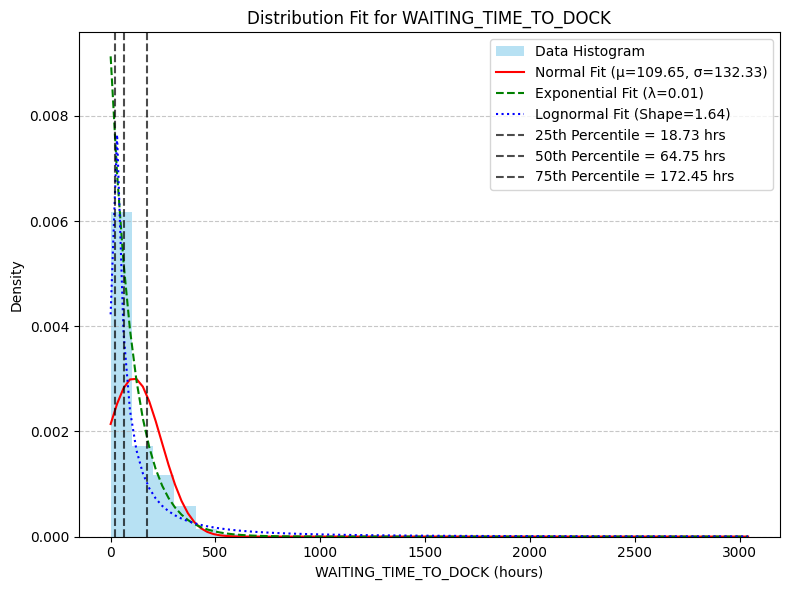

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm

# Convert datetime data to total hours (for numeric operations)
cleaned_data = cleaned_data['WAITING_TIME_TO_DOCK'].dropna()
cleaned_data = cleaned_data.dt.total_seconds() / 3600  # Convert to hours

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the cleaned data histogram
plt.hist(cleaned_data, bins=30, density=True, alpha=0.6, color='skyblue', label='Data Histogram')

# Fit and plot normal distribution
mu, std = norm.fit(cleaned_data)
x = np.linspace(cleaned_data.min(), cleaned_data.max(), 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'r-', label=f'Normal Fit (μ={mu:.2f}, σ={std:.2f})')

# Fit and plot exponential distribution
loc, scale = expon.fit(cleaned_data)
p_expon = expon.pdf(x, loc, scale)
plt.plot(x, p_expon, 'g--', label=f'Exponential Fit (λ={1/scale:.2f})')

# Fit and plot lognormal distribution
shape, loc_ln, scale_ln = lognorm.fit(cleaned_data, floc=0)
p_lognorm = lognorm.pdf(x, shape, loc_ln, scale_ln)
plt.plot(x, p_lognorm, 'b:', label=f'Lognormal Fit (Shape={shape:.2f})')

# Highlight percentiles
percentiles = {'25th Percentile': np.percentile(cleaned_data, 25),
               '50th Percentile': np.percentile(cleaned_data, 50),
               '75th Percentile': np.percentile(cleaned_data, 75)}
for p, value in percentiles.items():
    plt.axvline(value, color='k', linestyle='--', alpha=0.7, label=f'{p} = {value:.2f} hrs')

# Add labels and legend
plt.title('Distribution Fit for WAITING_TIME_TO_DOCK')
plt.xlabel('WAITING_TIME_TO_DOCK (hours)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


FEATURE SELECTION

In [138]:
# Define the target variable (TAT)
data['TURN_AROUND_TIME'] = pd.to_datetime(data['DROP PILOT']) - pd.to_datetime(data['ARRIVED O/A'])
data['TURN_AROUND_TIME_HOURS'] = data['TURN_AROUND_TIME'].dt.total_seconds() / 3600

In [164]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Ensure 'TURN_AROUND_TIME_HOURS' is numeric and non-NaN
cleaned_data = data.dropna(subset=['TURN_AROUND_TIME_HOURS'] + candidate_features)
cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)

# Label encode 'MACHINE TYPE' if it's categorical
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Define features (X) and target (y)
candidate_features = [
    'TOTAL TEUs','WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY',
    'MACHINE TYPE'
]
X = cleaned_data[candidate_features]
y = cleaned_data['TURN_AROUND_TIME_HOURS']

# 1. Correlation-based feature selection
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix['TURN_AROUND_TIME_HOURS'].sort_values(ascending=False)

# 2. Univariate feature selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-based feature selection (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': feature_importances
}

# Display feature selection results
print(feature_selection_results)


<ipython-input-164-b2f1623cabee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)
<ipython-input-164-b2f1623cabee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))


DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [166]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Ensure 'TURN_AROUND_TIME_HOURS' is numeric and non-NaN
cleaned_data = data.dropna(subset=['TURN_AROUND_TIME_HOURS'] + candidate_features)
cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)

# Label encode 'MACHINE TYPE' if it's categorical
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Define features (X) and target (y)
candidate_features = [
    'TOTAL TEUs','WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
    'UNLOADING_TIME','PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY',
    'MACHINE TYPE'
]

# Convert Timedelta features to numeric (total seconds)
for feature in ['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']:
    if feature in cleaned_data.columns:
        cleaned_data[feature] = cleaned_data[feature].dt.total_seconds()  # Convert to total seconds

X = cleaned_data[candidate_features]
y = cleaned_data['TURN_AROUND_TIME_HOURS']

# 1. Correlation-based feature selection
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix['TURN_AROUND_TIME_HOURS'].sort_values(ascending=False)

# 2. Univariate feature selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-based feature selection (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': feature_importances
}

# Display feature selection results
print(feature_selection_results)

<ipython-input-166-9632c2d0c8e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TURN_AROUND_TIME_HOURS'] = cleaned_data['TURN_AROUND_TIME_HOURS'].astype(float)
<ipython-input-166-9632c2d0c8e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))
<ipython-input-166-9632c2d0c8e0>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

{'Correlation with Target': {'TURN_AROUND_TIME_HOURS': 1.0, 'OPERATION_TIME': 0.034121485692826616, 'WAITING_TIME_TO_DOCK': 0.027036491051150323, 'WAITING_OPERATIONS': 0.00457808865864965, 'UNLOADING_TIME': 0.002498037887468299, 'TOTAL TEUs': -0.0006060378968035765, 'PORT PRODUCTIVITY': -0.015109737503043811, 'MACHINE TYPE': -0.01638939996661377, 'OPERATIONS PRODUCTIVITY': -0.05344762694092492, 'BERTH PRODUCTIVITY': -0.05440446653934405}, 'Univariate Scores': {'TOTAL TEUs': 0.0005850803331420819, 'WAITING_TIME_TO_DOCK': 1.1652899485833612, 'WAITING_OPERATIONS': 0.033388220736203636, 'OPERATION_TIME': 1.8568532161535536, 'UNLOADING_TIME': 0.00994068993837939, 'PORT PRODUCTIVITY': 0.36377158925535547, 'BERTH PRODUCTIVITY': 4.729031851144157, 'OPERATIONS PRODUCTIVITY': 4.563678405765051, 'MACHINE TYPE': 0.42801457304124485}, 'Model Importances': {'TOTAL TEUs': 0.15112093482768743, 'WAITING_TIME_TO_DOCK': 0.11096180241958568, 'WAITING_OPERATIONS': 0.12163367029493509, 'OPERATION_TIME': 0.1

In [170]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define target and candidate features
target = 'TURN_AROUND_TIME_HOURS'
candidate_features = [
    'TOTAL TEUs', 'WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME',
    'UNLOADING_TIME', 'PORT PRODUCTIVITY', 'BERTH PRODUCTIVITY',
    'OPERATIONS PRODUCTIVITY', 'MACHINE TYPE'
]

# Drop rows with NaN values in target or candidate features
cleaned_data = data.dropna(subset=[target] + candidate_features)

# Ensure target is numeric
cleaned_data[target] = cleaned_data[target].astype(float)

# Encode 'MACHINE TYPE' as numeric if it exists
if 'MACHINE TYPE' in cleaned_data.columns:
    encoder = LabelEncoder()
    cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))

# Convert timedelta columns to numeric (total seconds)
timedelta_features = ['WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME', 'UNLOADING_TIME']
for feature in timedelta_features:
    if feature in cleaned_data.columns:
        cleaned_data[feature] = cleaned_data[feature].dt.total_seconds()

# Define features (X) and target (y)
X = cleaned_data[candidate_features]
y = cleaned_data[target]

# Feature Selection Techniques
# 1. Correlation with Target
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# 2. Univariate Feature Selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-Based Feature Importance (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
model_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': model_importances
}

# Combine results into a DataFrame for tabular representation
results_table = pd.DataFrame({
    'Feature': candidate_features,
    'Correlation with Target': [feature_selection_results['Correlation with Target'].get(f, None) for f in candidate_features],
    'Univariate Scores': [feature_selection_results['Univariate Scores'].get(f, None) for f in candidate_features],
    'Model Importances': [feature_selection_results['Model Importances'].get(f, None) for f in candidate_features],
})

# Sort results by Model Importances for better readability
results_table = results_table.sort_values(by='Model Importances', ascending=False)

# Print Results
print(results_table)


<ipython-input-170-442f1e8682bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[target] = cleaned_data[target].astype(float)
<ipython-input-170-442f1e8682bd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['MACHINE TYPE'] = encoder.fit_transform(cleaned_data['MACHINE TYPE'].astype(str))
<ipython-input-170-442f1e8682bd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

                   Feature  Correlation with Target  Univariate Scores  \
7  OPERATIONS PRODUCTIVITY                -0.053448           4.563678   
0               TOTAL TEUs                -0.000606           0.000585   
5        PORT PRODUCTIVITY                -0.015110           0.363772   
3           OPERATION_TIME                 0.034121           1.856853   
2       WAITING_OPERATIONS                 0.004578           0.033388   
1     WAITING_TIME_TO_DOCK                 0.027036           1.165290   
6       BERTH PRODUCTIVITY                -0.054404           4.729032   
4           UNLOADING_TIME                 0.002498           0.009941   
8             MACHINE TYPE                -0.016389           0.428015   

   Model Importances  
7           0.157829  
0           0.151121  
5           0.136422  
3           0.122943  
2           0.121634  
1           0.110962  
6           0.098171  
4           0.077432  
8           0.023487  


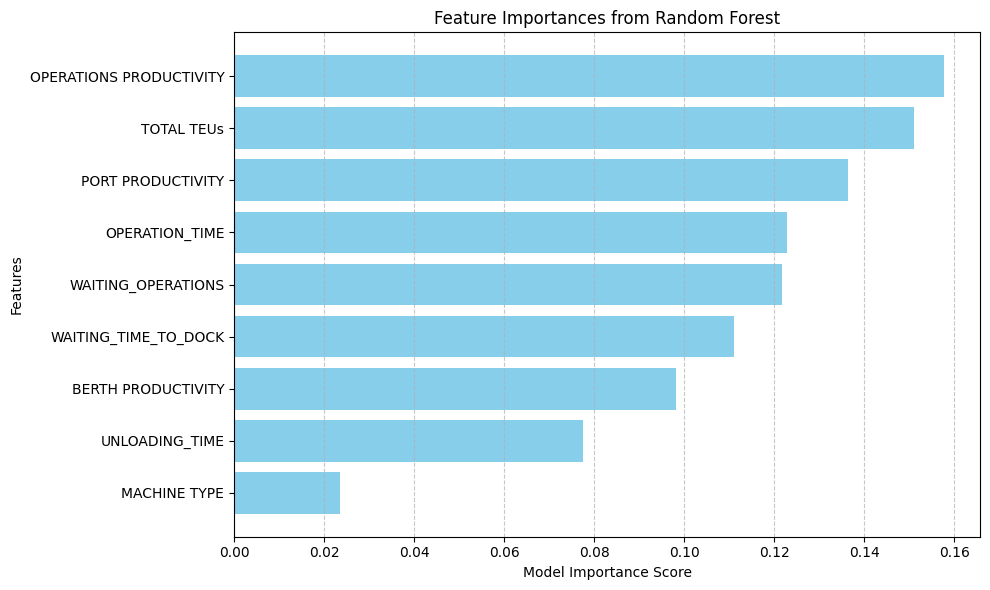

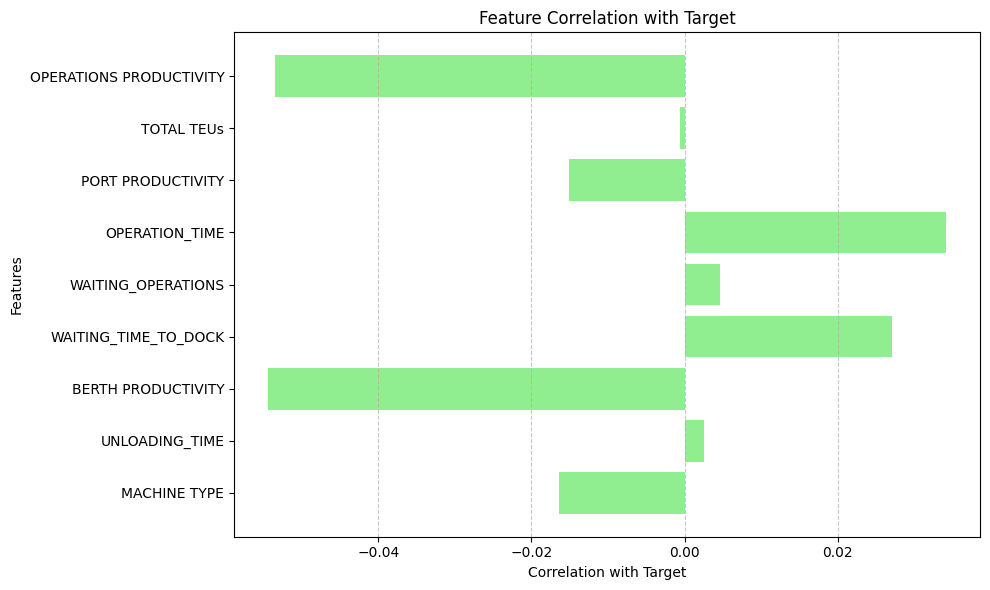

In [171]:
import matplotlib.pyplot as plt

# Visualize feature importances from Random Forest
plt.figure(figsize=(10, 6))
plt.barh(results_table['Feature'], results_table['Model Importances'], color='skyblue')
plt.xlabel('Model Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize correlation with target
plt.figure(figsize=(10, 6))
plt.barh(results_table['Feature'], results_table['Correlation with Target'], color='lightgreen')
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Feature Correlation with Target')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


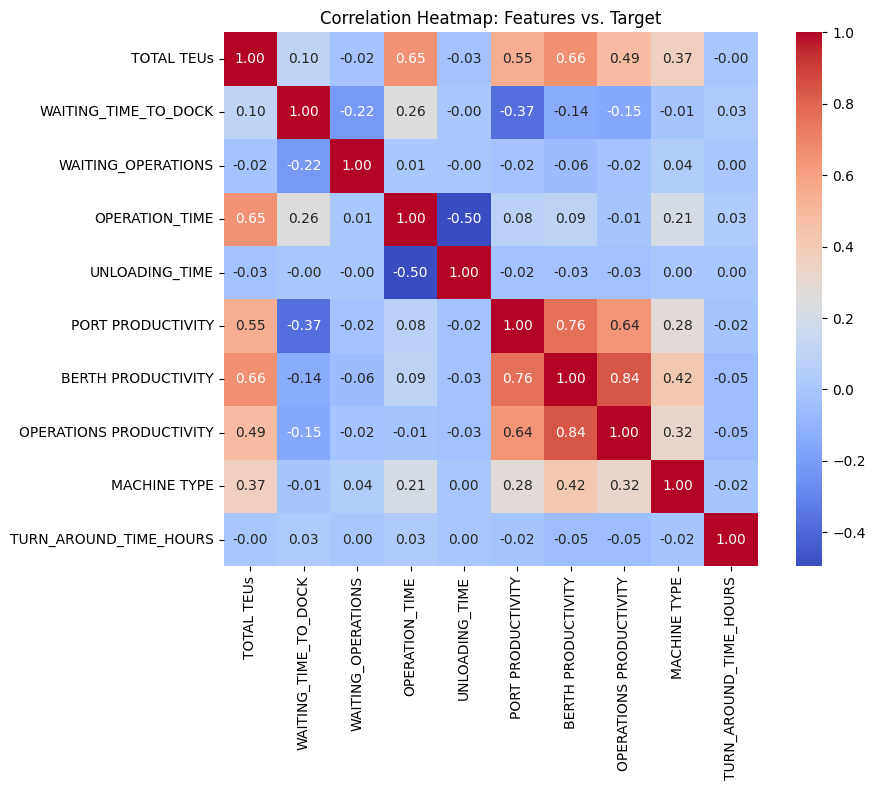

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract correlation matrix for the candidate features and target
correlation_matrix = cleaned_data[candidate_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap: Features vs. Target')
plt.tight_layout()
plt.show()


In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate Variance Inflation Factor (VIF)
X_features = cleaned_data[candidate_features].dropna()  # Drop rows with NaN for accurate VIF calculation

# VIF calculation requires numeric data only
vif_data = pd.DataFrame()
vif_data["Feature"] = X_features.columns
vif_data["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

# Display the VIF values
print(vif_data)


                   Feature        VIF
0               TOTAL TEUs  23.944410
1     WAITING_TIME_TO_DOCK   2.064011
2       WAITING_OPERATIONS   1.101672
3           OPERATION_TIME  16.733744
4           UNLOADING_TIME   2.330542
5        PORT PRODUCTIVITY   8.251969
6       BERTH PRODUCTIVITY  41.024850
7  OPERATIONS PRODUCTIVITY  16.281429
8             MACHINE TYPE  12.650358


How to Interpret VIF:

    VIF < 5: Low multicollinearity (acceptable).
    VIF 5-10: Moderate multicollinearity (may require attention).
    VIF > 10: High multicollinearity (consider removing or transforming features).


Explanation:

    VIF Calculation:
        The function calculate_vif computes the VIF for all features.

    Feature Removal:
        The feature with the highest VIF is removed iteratively until all remaining features have VIF <= 10.

    Final Output:
        Displays the refined feature set and their corresponding VIF values.

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF calculation
current_features = cleaned_data[candidate_features].dropna()
vif_data = calculate_vif(current_features)

# Iteratively remove features with high VIF (>10)
while vif_data["VIF"].max() > 10:
    # Find the feature with the highest VIF
    high_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
    print(f"Removing feature with high VIF: {high_vif_feature} (VIF={vif_data['VIF'].max():.2f})")

    # Drop the feature and recalculate VIF
    current_features = current_features.drop(columns=[high_vif_feature])
    vif_data = calculate_vif(current_features)

# Final VIF DataFrame after refinement
refined_features = current_features.columns.tolist()
final_vif_data = calculate_vif(current_features)

# Display refined features and VIF values
print("Refined Features and Their VIF:")
print(final_vif_data)


Removing feature with high VIF: BERTH PRODUCTIVITY (VIF=41.02)
Removing feature with high VIF: TOTAL TEUs (VIF=16.37)
Refined Features and Their VIF:
                   Feature       VIF
0     WAITING_TIME_TO_DOCK  2.002516
1       WAITING_OPERATIONS  1.096460
2           OPERATION_TIME  4.736560
3           UNLOADING_TIME  1.421809
4        PORT PRODUCTIVITY  5.745193
5  OPERATIONS PRODUCTIVITY  8.208998
6             MACHINE TYPE  8.259549
